# Analysis of data from public WhatsApp groups
Exploration and visualization of the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
import unicodedata, re, itertools, sys
from urllib.request import urlopen
import json
import plotly.express as px

%matplotlib inline

sns.set(style="darkgrid")

In [2]:
base = 2018
show = False

In [3]:
filepath = 'data/' + str(base) + '/fakeWhatsApp.BR_' + str(base) + '.csv'
df = pd.read_csv(filepath)  #('data/2020/wpp_2020_stage1.csv')
df.head(5)

/home/cabral/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id      date   hour ddi country country_iso3 ddd  \
0  3631133147603888180  01/08/18  13:13  55  BRASIL          BRA  17   
1  3631133147603888180  01/08/18  13:24  55  BRASIL          BRA  17   
2  3631133147603888180  01/08/18  13:24  55  BRASIL          BRA  17   
3 -4391661641377612003  01/08/18  13:28  55  BRASIL          BRA  13   
4 -4391661641377612003  09/08/18  14:46  55  BRASIL          BRA  13   

       state   group  midia  url  characters  words  viral  sharings  \
0  São Paulo  2018_1      1    0          25      4      0         1   
1  São Paulo  2018_1      0    0          58      9      1         2   
2  São Paulo  2018_1      1    0          25      4      0         1   
3  São Paulo  2018_1      0    0           5      1      0         1   
4  São Paulo  2018_1      1    0          25      4      0         1   

                                                text  misinformation  
0                          <Arquivo de mídia oculto>               0  
1  O Bolsonaro tem que estar preparado pra respon...               0  
2                          <Arquivo de mídia oculto>               0  
3                                              Boaaa               0  
4                          <Arquivo de mídia oculto>               0

In [112]:
# UNCOMMENT ONLY IF NOT LABELED YET!!!!
#df['misinformation'] = [0]*len(df)

# Basic statistics

In [113]:
df.describe()[['characters','words','sharings']]

characters          words       sharings
count  282601.000000  282601.000000  282601.000000
mean       97.638688      14.962091       1.755716
std       407.238452      61.842076       5.122241
min         1.000000       1.000000       1.000000
25%        25.000000       4.000000       1.000000
50%        25.000000       4.000000       1.000000
75%        43.000000       7.000000       1.000000
max     65536.000000    5486.000000      91.000000

In [114]:
total_msg = len(df)
total_groups = len(df['group'].unique())
total_users = len(df['id'].unique())
print('Total groups analyzed: ',total_groups)
print('Total unique users: ', total_users)
print('Total messages: ', total_msg)
print('Message/user ratio: ', total_msg/len(df['id'].unique()))

Total groups analyzed:  59
Total unique users:  5364
Total messages:  282601
Message/user ratio:  52.68475018642804


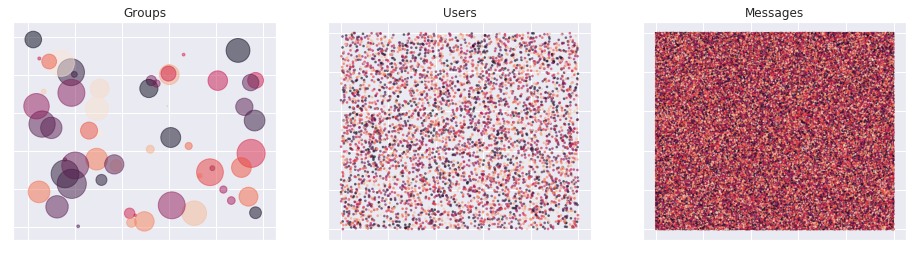

In [115]:
#Visualization of scale
# Fixing random state for reproducibility
np.random.seed(42)

plt.figure(figsize=(16, 4))

### grupos
N = total_groups
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.subplot(131)
plt.title('Groups')
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.tick_params(
    axis = 'both',
    left = False,
    right = False,
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft = False) # labels along the bottom edge are off

#####users
N = total_users
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)

plt.subplot(132)
plt.title('Users')
plt.scatter(x, y, s=3, c=colors, alpha=0.5)
plt.tick_params(
    axis = 'both',
    left = False,
    right = False,
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft = False) # labels along the bottom edge are off

#####msgs
N = total_msg
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)

plt.subplot(133)
plt.title('Messages')
plt.scatter(x, y, s=1, c=colors, alpha=0.5)
plt.tick_params(
    axis = 'both',
    left = False,
    right = False,
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft = False) # labels along the bottom edge are off

plt.show()

## Proportions

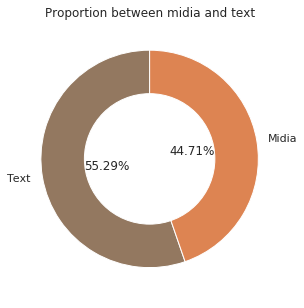

In [116]:
# midia and text
#plt.style.use('default')
#plt.style.use('bmh')
plt.figure(figsize=(5, 5))
plt.title('Proportion between midia and text')
x = [len(df[df['midia']==0]),len(df[df['midia']==1])]
names = ['Text','Midia']
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4, colors = ['C5','C1'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

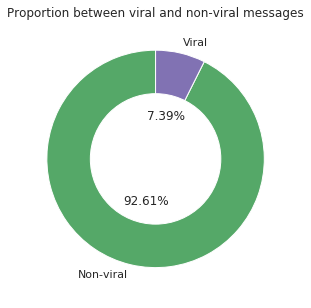

In [117]:
#sharings
#plt.style.use('bmh')
plt.figure(figsize=(5, 5))
plt.title('Proportion between viral and non-viral messages')
x = [len(df[df['viral']==0]),len(df[df['viral']==1])]
names = ['Non-viral','Viral']
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4, colors = ['C2','C4'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

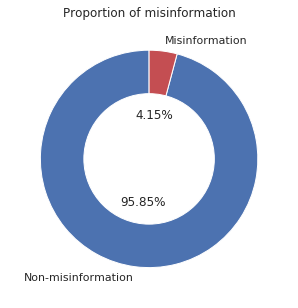

In [118]:
#misinformation
#plt.style.use('bmh')
plt.figure(figsize=(5, 5))
plt.title('Proportion of misinformation')
x = [len(df[df['misinformation']==0]),len(df[df['misinformation']==1])]
names = ['Non-misinformation','Misinformation']
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4, colors = ['C0','C3'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# GEOGRAPHIC DATA

In [119]:
#plt.style.use('default')
df_br_states = df[(df['state'] != '?') & (df['state'] != 'Estrangeiro') ]
counts = df_br_states.groupby(by='state').count()['id'].sort_index(ascending=False)
non_mis_counts = df_br_states[df_br_states['misinformation'] == 0].groupby(by='state').count()['id'].sort_index(ascending=False) 
misinformations_counts = df_br_states[df_br_states['misinformation'] == 1].groupby(by='state').count()['id'].sort_index(ascending=False) 
states = list(counts.index)
ratio = np.true_divide(misinformations_counts.values,counts.values)
mis_by_state = pd.DataFrame({'state':states,
                             'total messages':counts.values,
                             'non-misinformation':non_mis_counts,
                             'misinformation':misinformations_counts,
                             'ratio':ratio})
#mis_by_state.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')
mis_by_state

state  total messages  non-misinformation  \
state                                                                          
Tocantins                      Tocantins           40217               37759   
São Paulo                      São Paulo           43955               42351   
Sergipe                          Sergipe            3200                3089   
Santa Catarina            Santa Catarina           11950               11452   
Roraima                          Roraima             622                 601   
Rondônia                        Rondônia            1230                1195   
Rio de Janeiro            Rio de Janeiro           20758               19914   
Rio Grande do Sul      Rio Grande do Sul            3928                3771   
Rio Grande do Norte  Rio Grande do Norte            3568                3442   
Piauí                              Piauí            5567                5332   
Pernambuco                    Pernambuco           10956               10546   
Pará                                Pará            6974                6637   
Paraíba                          Paraíba            2323                2257   
Paraná                            Paraná            8372                7874   
Minas Gerais                Minas Gerais           17251               16456   
Mato Grosso do Sul    Mato Grosso do Sul            3903                3696   
Mato Grosso                  Mato Grosso            5048                4811   
Maranhão                        Maranhão           18610               18221   
Goiás                              Goiás           13295               12724   
Espírito Santo            Espírito Santo            1489                1394   
Distrito Federal        Distrito Federal            8240                7834   
Ceará                              Ceará            9993                9525   
Bahia                              Bahia           10034                9664   
Amazonas                        Amazonas           17460               17171   
Amapá                              Amapá             290                 278   
Alagoas                          Alagoas             424                 414   
Acre                                Acre             404                 395   

                     misinformation     ratio  
state                                          
Tocantins                      2458  0.061118  
São Paulo                      1604  0.036492  
Sergipe                         111  0.034688  
Santa Catarina                  498  0.041674  
Roraima                          21  0.033762  
Rondônia                         35  0.028455  
Rio de Janeiro                  844  0.040659  
Rio Grande do Sul               157  0.039969  
Rio Grande do Norte             126  0.035314  
Piauí                           235  0.042213  
Pernambuco                      410  0.037422  
Pará                            337  0.048322  
Paraíba                          66  0.028412  
Paraná                          498  0.059484  
Minas Gerais                    795  0.046084  
Mato Grosso do Sul              207  0.053036  
Mato Grosso                     237  0.046949  
Maranhão                        389  0.020903  
Goiás                           571  0.042948  
Espírito Santo                   95  0.063801  
Distrito Federal                406  0.049272  
Ceará                           468  0.046833  
Bahia                           370  0.036875  
Amazonas                        289  0.016552  
Amapá                            12  0.041379  
Alagoas                          10  0.023585  
Acre                              9  0.022277

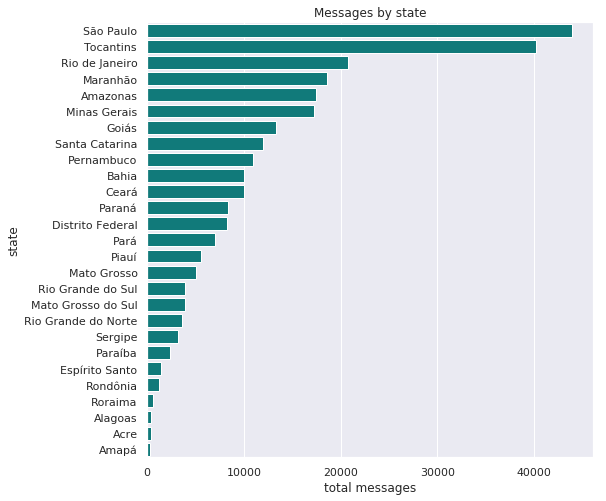

In [120]:
mis_by_state = mis_by_state.sort_values(by = 'total messages', ascending = False)
plt.figure(figsize=(8, 8))
plt.title('Messages by state')
sns.barplot(y='state',x='total messages', data = mis_by_state, color = 'darkcyan')
plt.show()

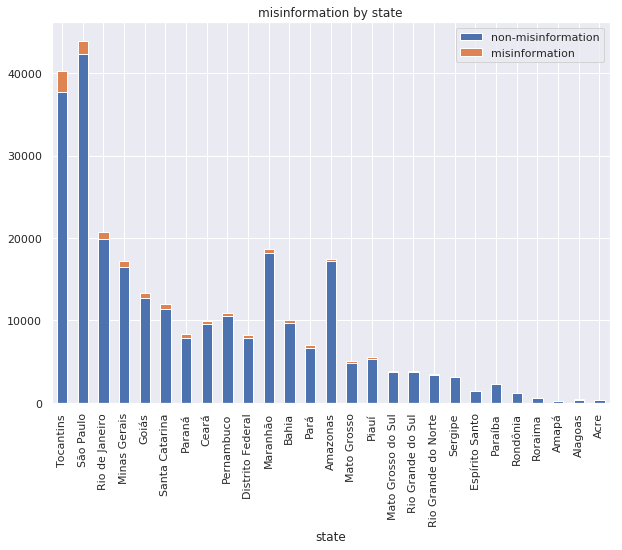

In [121]:
t = 'misinformation by state'
mis_by_state = mis_by_state.sort_values(by = 'misinformation', ascending = False)
mis_by_state.loc[:,['non-misinformation', 'misinformation']].plot.bar(stacked=True, figsize=(10,7),title = t)

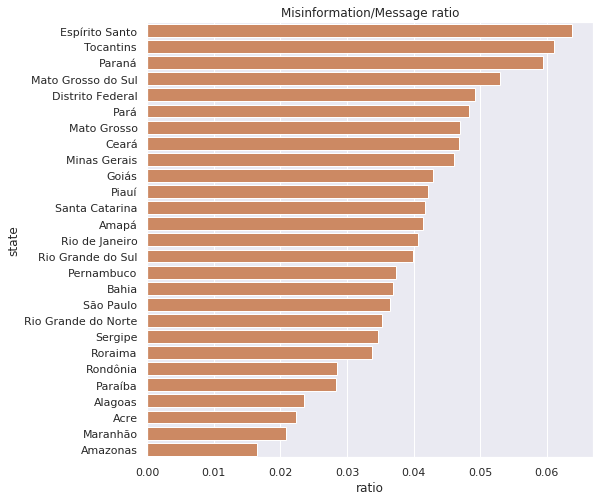

In [122]:
mis_by_state = mis_by_state.sort_values(by = 'ratio', ascending = False)
plt.figure(figsize=(8, 8))
plt.title('Misinformation/Message ratio')
sns.barplot(y='state', x ='ratio', data = mis_by_state, color = 'C1')
plt.show()

### Maps

In [123]:
geobr = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
with urlopen(geobr) as response:
    geo_states = json.load(response)

In [124]:
#messages
fig = px.choropleth(mis_by_state, geojson = geo_states, locations='state',featureidkey="properties.name",
                           color='total messages',
                           color_continuous_scale="blues",
                           #range_color=(0, 0.07),
                           scope="south america",
                           labels={'ratio':'misinformation/message ratio'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html("plots/"+str(base)+"/map_messages_br_states.html")

if show:
    fig.show()

In [125]:
#ratio
fig = px.choropleth(mis_by_state, geojson = geo_states, locations='state',featureidkey="properties.name",
                           color='ratio',
                           color_continuous_scale="oranges",
                           range_color=(0, 0.07),
                           scope="south america",
                           labels={'ratio':'misinformation/message ratio'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html("plots/"+str(base)+"/map_ratio_br_states.html")
if show:
    fig.show()

## Other countries

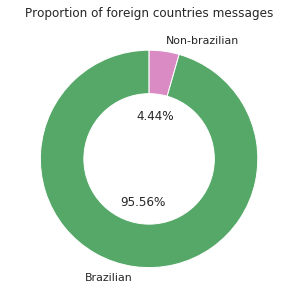

In [126]:
#misinformation
#plt.style.use('bmh')
plt.figure(figsize=(5, 5))
plt.title('Proportion of foreign countries messages')
x = [len(df[df['country']=='BRASIL']),len(df[df['country']!='BRASIL'])]
names = ['Brazilian','Non-brazilian']
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4, colors = ['C2','C6'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [127]:
#plt.style.use('default')
df_foreign = df[(df['state'] == 'Estrangeiro')]
counts = df_foreign.groupby(by='country').count()['id'].sort_index(ascending=False)
non_mis_counts = df_foreign[df_foreign['misinformation'] == 0].groupby(by='country').count()['id'].sort_index(ascending=False) 

misinformations_counts = df_foreign[df_foreign['misinformation'] == 1].groupby(by='country').count()['id'].sort_index(ascending=False) 
mis_dict = dict(misinformations_counts)
mis_keys = list(non_mis_counts.index)
mis_values = [mis_dict.get(m,0) for m in mis_keys]
mis_dict = dict(zip(mis_keys,mis_values))
misinformations_counts = pd.Series(mis_dict)

country2ISO3 = {
    'ESTADOS UNIDOS':'USA',
    'PORTUGAL':'PRT',
    'BRASIL':'BRA',
    'PAQUISTÃO':'PAK',
    'PARAGUAI':'PRY',
    'ESPANHA':'ESP',
    'ITÁLIA':'ITA',
    'ILHA DE MAN':'IMN',
    'ALEMANHA':'DEU',
    'SURINAME':'SUR',
    'VENEZUELA':'VEN',
    'FRANÇA':'FRA',
    'ILHAS COCOS (KEELING)':'CCK',
    'BOLÍVIA':'BOL',
    'ANGOLA':'AGO',
    'ARGENTINA':'ARG',
    'MARROCOS':'MAR',
    'RÚSSIA':'RUS',
    'NOVA ZELANDIA':'NZL',
    'ÍNDIA':'IND',
    'ÁFRICA DO SUL':'ZAF',
    'IÊMEN':'YEM',
    'EGITO':'EGY',
    'TURQUIA':'TUR',
    'MOÇAMBIQUE':'MOZ',
    'GUIANA':'GUY',
    'BENIM':'BEN',
    'COLÔMBIA':'COL',
    'BÉLGICA':'BEL',
    'PERU':'PER',
    'NORUEGA':'NOR',
    'ARÁBIA SAUDITA':'SAU',
    'SUIÇA':'CHE',
    'GANA':'GHA',
    'MÉXICO':'MEX',
    'CHILE':'CHL',
    'SÃO TOMÉ E PRÍNCIPE':'STP',
    'JAPÃO':'JPN',
    'IRÃ':'IRN',
    'INDONÉSIA':'IDN',
    'GUATEMALA':'GTM',
    'PAÍSES BAIXOS':'NLD',
    'SRI LANKA':'LKA',
    'EQUADOR':'ECU',
    'CABO VERDE':'CPV',
    'URUGUAI':'URY',
    'SUÉCIA':'SWE'
}
country = list(counts.index)
iso3 = [country2ISO3[c] for c in country]

ratio = np.true_divide(misinformations_counts.values, counts.values)
mis_by_country = pd.DataFrame({'country':country,
                             'iso3': iso3, 
                             'total messages':counts.values,
                             'non-misinformation':non_mis_counts,
                             'misinformation':misinformations_counts,
                             'ratio':ratio})
mis_by_country = mis_by_country.sort_values(by= 'total messages', ascending = False)
mis_by_country

country iso3  total messages  \
country                                                             
ESTADOS UNIDOS                ESTADOS UNIDOS  USA            1287   
PARAGUAI                            PARAGUAI  PRY             255   
PORTUGAL                            PORTUGAL  PRT             228   
FRANÇA                                FRANÇA  FRA             141   
BOLÍVIA                              BOLÍVIA  BOL              92   
ESPANHA                              ESPANHA  ESP              81   
NOVA ZELANDIA                  NOVA ZELANDIA  NZL              61   
ITÁLIA                                ITÁLIA  ITA              45   
ILHAS COCOS (KEELING)  ILHAS COCOS (KEELING)  CCK              32   
SURINAME                            SURINAME  SUR              26   
ILHA DE MAN                      ILHA DE MAN  IMN              22   
MARROCOS                            MARROCOS  MAR               9   
PAQUISTÃO                          PAQUISTÃO  PAK               3   
ARGENTINA                          ARGENTINA  ARG               2   
ANGOLA                                ANGOLA  AGO               2   
VENEZUELA                          VENEZUELA  VEN               2   
RÚSSIA                                RÚSSIA  RUS               1   
ÍNDIA                                  ÍNDIA  IND               1   

                       non-misinformation  misinformation     ratio  
country                                                              
ESTADOS UNIDOS                       1230              57  0.044289  
PARAGUAI                              254               1  0.003922  
PORTUGAL                              210              18  0.078947  
FRANÇA                                141               0  0.000000  
BOLÍVIA                                91               1  0.010870  
ESPANHA                                79               2  0.024691  
NOVA ZELANDIA                          60               1  0.016393  
ITÁLIA                                 39               6  0.133333  
ILHAS COCOS (KEELING)                  31               1  0.031250  
SURINAME                               26               0  0.000000  
ILHA DE MAN                            21               1  0.045455  
MARROCOS                                9               0  0.000000  
PAQUISTÃO                               3               0  0.000000  
ARGENTINA                               2               0  0.000000  
ANGOLA                                  2               0  0.000000  
VENEZUELA                               2               0  0.000000  
RÚSSIA                                  1               0  0.000000  
ÍNDIA                                   1               0  0.000000

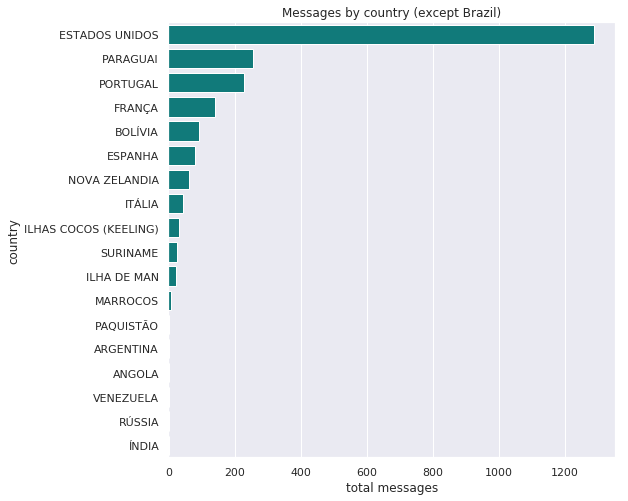

In [128]:
plt.figure(figsize=(8, 8))
plt.title('Messages by country (except Brazil)')
sns.barplot(y='country',x='total messages', data = mis_by_country, color = 'darkcyan')
plt.show()

In [129]:
geo = 'https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson'
with urlopen(geo) as response:
    geo_world = json.load(response)

In [130]:
geo_world['features'][0]['properties']

{'ADMIN': 'Aruba', 'ISO_A3': 'ABW', 'ISO_A2': 'AW'}

In [131]:
#total messages
fig = px.choropleth(mis_by_country, geojson = geo_world, locations='iso3',featureidkey="properties.ISO_A3",
                           color='total messages',
                           color_continuous_scale="algae",
                           #range_color=(0, 14),
                           #scope="south america",
                           labels={'total messages':'total messages'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html("plots/"+str(base)+"/map_messages_world.html")
if show:
    fig.show()

# Time series analysis

In [132]:
def custom_time(data,hora):
    string = data + " " + hora
    return string
df['timestamp'] = df.apply(lambda x: custom_time(x['date'],x['hour']),axis=1)

In [133]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%m/%y %H:%M')
timeseries = df.groupby('timestamp').count()['id']
#timeseries = timeseries.sort_index()
fig = px.line(x=timeseries.index, y=timeseries.values, title = 'Timeseries visualization')
fig.show()

In [134]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')
timeseries = df.groupby('date').count()['id']
timeseries = timeseries.sort_index()
fig = px.line(x=timeseries.index, y=timeseries.values, title = 'Timeseries visualization by day')
fig.show()

In [135]:
df['hour'] = pd.to_datetime(df['hour'], format = '%H:%M' )
timeseries = df.groupby('hour').count()['id']
timeseries = timeseries.sort_index()
fig = px.line(x=timeseries.index, y=timeseries.values, title = 'Timeseries visualization by hour')
fig.show()

# Distribuitions

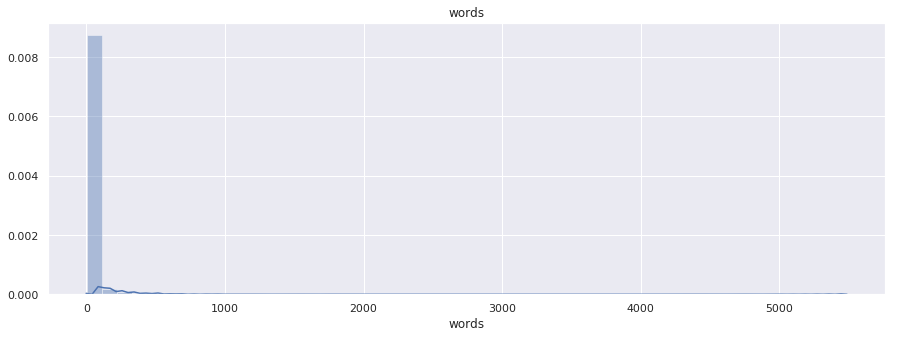

In [136]:
plt.figure(figsize=(15, 5))
plt.title('words')
sns.distplot(df[df['midia'] == 0]['words'], rug = False, kde = True)
plt.show()

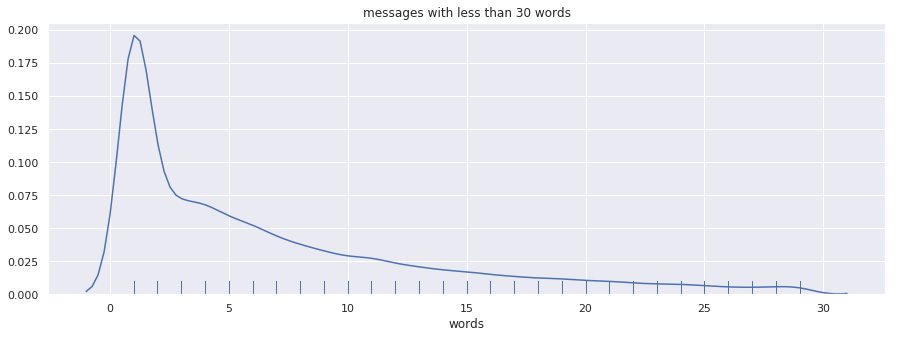

In [137]:
plt.figure(figsize=(15, 5))
plt.title('messages with less than 30 words')
sns.distplot(df[(df['midia'] == 0) & (df['words'] < 30)]['words'], hist = False, rug = True, kde = True)
#plt.show()

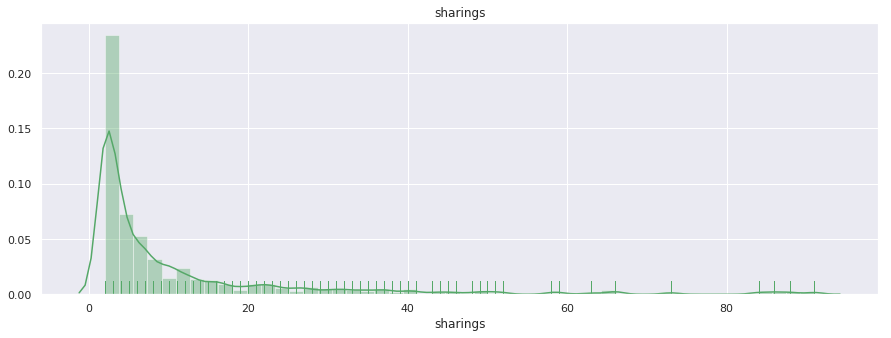

In [138]:
plt.figure(figsize=(15, 5))
plt.title('sharings')
sns.distplot(df[df['sharings'] > 1]['sharings'], rug = True, kde = True, color = 'C2')
plt.show()

# Most active users

In [139]:
df['text'] = [str(m) for m in df['text']]

def getUserData(df,users):
    '''
    Creates a DataFrame with most active users information
    Input: DataFrame with all data, number of users desired
    Output: DataFrame with number of messages, number of texts, number of midia files, ddd, ddi, state, country and all texts
    '''
    texto = []
    midia = []
    pais = []
    estado = []
    ddd = []
    ddi = []
    msg_str = []
    for user in users.index:
        texto.append(len(df[(df['id'] == user) & (df['midia']==0)]))
        midia.append(len(df[(df['id'] == user)]) - len(df[(df['id'] == user) & (df['midia']==0)]))
        pais.append(df[df['id']==user].iloc[0]['country'])
        estado.append(df[df['id']==user].iloc[0]['state'])
        ddd.append(df[df['id']==user].iloc[0]['ddd'])
        ddi.append(df[df['id']==user].iloc[0]['ddi'])
        msgs = df[(df['id']==user) & (df['midia']==0)]['text']
        msgs = list(msgs.values)
        msgs = " <-> ".join(msgs)
        msg_str.append(msgs)
        
    topUsers = pd.DataFrame({'id':user, 'count messsages':users.values, 
                             'texts':texto, 'midia':midia,
                             'ddi':ddi,'ddd':ddd,'country':pais,
                             'state':estado,'messages':msg_str})    
    return topUsers
    

def getTopUsers(df,top=20):
    groupedByid = df.groupby(['id']).count()
    groupedByid = groupedByid.sort_values('date', ascending=False)[0:top]['date']
    return getUserData(df,groupedByid)

topUsers = getTopUsers(df,10)
topUsers

id  count messsages  texts  midia ddi ddd country  \
0  3201344459315743060             4396   3742    654  55  11  BRASIL   
1  3201344459315743060             2332    972   1360   ?   ?       ?   
2  3201344459315743060             2064    948   1116  55  67  BRASIL   
3  3201344459315743060             2020   1587    433  55  63  BRASIL   
4  3201344459315743060             1810    828    982  55  31  BRASIL   
5  3201344459315743060             1584    466   1118  55  14  BRASIL   
6  3201344459315743060             1271    388    883  55  61  BRASIL   
7  3201344459315743060             1172    994    178  55  99  BRASIL   
8  3201344459315743060             1166    284    882  55  91  BRASIL   
9  3201344459315743060             1126    950    176  55  92  BRASIL   

                state                                           messages  
0           São Paulo  Ontem eu vi um vídeo de um travesti xingando a...  
1                   ?  Fazer campanha contraria tbm ajuda <-> É verda...  
2  Mato Grosso do Sul  Kkkk as urnas que são fraudadas kkkk essa desc...  
3           Tocantins  *Ordem em meio a caos, o sucesso das escolas m...  
4        Minas Gerais  Para bom entendedor meia palavra basta.\nNo ge...  
5           São Paulo  Motor elétrico trifásico de 96 volts e 71 cava...  
6    Distrito Federal  Liturgia Diária\nVoltar\nQuer ver a Liturgia d...  
7            Maranhão  Cara <-> Assisto os vídeos do Eneas hj em dia ...  
8                Pará  Olha aí Representantes de ONGs ensinando os ve...  
9            Amazonas  Boa noite caros amigos! <-> 🤝🏼 <-> Seja bem vi...

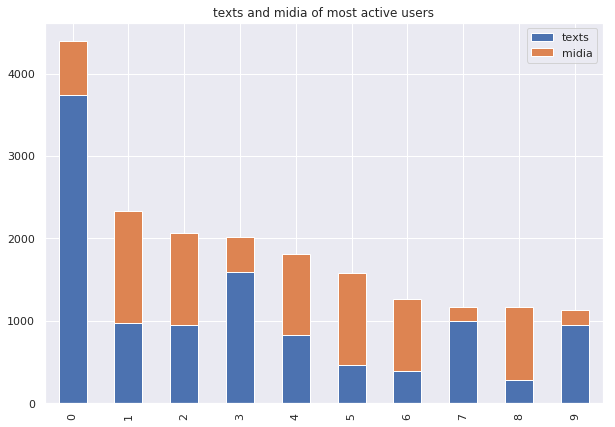

In [140]:
t = 'texts and midia of most active users'
topUsers.loc[:,['texts', 'midia']].plot.bar(stacked=True, figsize=(10,7),title= t)
plt.show()

# Users that shared more midia
Possible bot activity

In [141]:
def getTopMidiaUsers(df,top=20):
    groupedByID = df[df['midia']==1].groupby(['id']).count()
    groupedByID = groupedByID.sort_values('date', ascending=False)[0:top]['date']
    return getUserData(df,groupedByID)

topMidia = getTopMidiaUsers(df,10)
topMidia

id  count messsages  texts  midia ddi ddd country  \
0 -7481691239712874829             1360    972   1360   ?   ?       ?   
1 -7481691239712874829             1118    466   1118  55  14  BRASIL   
2 -7481691239712874829             1116    948   1116  55  67  BRASIL   
3 -7481691239712874829              982    828    982  55  31  BRASIL   
4 -7481691239712874829              883    388    883  55  61  BRASIL   
5 -7481691239712874829              882    284    882  55  91  BRASIL   
6 -7481691239712874829              741    279    741  55  31  BRASIL   
7 -7481691239712874829              683    272    683  55  63  BRASIL   
8 -7481691239712874829              654   3742    654  55  11  BRASIL   
9 -7481691239712874829              556    515    556  55  18  BRASIL   

                state                                           messages  
0                   ?  Fazer campanha contraria tbm ajuda <-> É verda...  
1           São Paulo  Motor elétrico trifásico de 96 volts e 71 cava...  
2  Mato Grosso do Sul  Kkkk as urnas que são fraudadas kkkk essa desc...  
3        Minas Gerais  Para bom entendedor meia palavra basta.\nNo ge...  
4    Distrito Federal  Liturgia Diária\nVoltar\nQuer ver a Liturgia d...  
5                Pará  Olha aí Representantes de ONGs ensinando os ve...  
6        Minas Gerais  Acabou de explodir o gasômetro da Usiminas <->...  
7           Tocantins  Bolsonaro já está eleito nos EUA, e o primeiro...  
8           São Paulo  Ontem eu vi um vídeo de um travesti xingando a...  
9           São Paulo  👏🏼👏🏼👏🏼😎😂 <-> 💪👊🏼🤜👊🏼😎😎😂😂 <-> https://sajjasite....

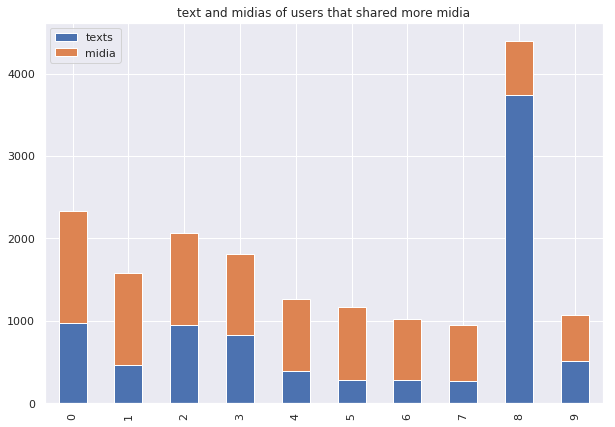

In [142]:
t = 'text and midias of users that shared more midia'
topMidia.loc[:,['texts', 'midia']].plot.bar(stacked=True, figsize=(10,7),title= t)
plt.show()

# Messages more shared in different groups

In [143]:
#df = df.groupby('domain')['ID'].nunique()
msg_group = df[df['viral']==1][['text','group']]
msg_group = msg_group.groupby('text')['group'].nunique()
msg_group = msg_group.sort_values(ascending=False)
topMsgs = msg_group[0:10]
topMsgs = topMsgs.to_frame()
topMsgs

group
text                                                     
_*TSE informa:*_ 7,2 milhões de votos anulados ...     34
Sem palavras, só divulgue para seus contatos e ...     34
Vamos fazer campanha inteligente e garantir a v...     32
Vamos dar "dislike" nos vídeos dos artistas "ro...     30
Enquete para presidência! *Quem é seu candidato...     29
Golpe, Golpe, Golpe... Adelio foi autorizado a ...     29
Nota Oficial :\n\nPessoal aqui quem lhe falam é...     29
Vota aí e repassa!!!      Vamos ver se o ibope ...     28
Olha só que ideia interessante...\n\nSe formos ...     27
*ATENÇÃO ELEITORES DE BOLSONARO*❗\n\nBolsonaro ...     27

# Viral messages
Possible misinformation

In [144]:
groupedByMsg = df[(df['midia'] == 0) & (df['text'] != 'Aguardando esta mensagem') & 
                  (df['text'] != 'Mensagem incompatível') & 
                  (df['text'] != 'Esta mensagem foi apagada') & (df['text'] != 'nan') & 
                  (df['words'] > 3)].groupby(['text']).count()
groupedByMsg = groupedByMsg.sort_values('date', ascending=False)['id']
groupedByMsg = pd.DataFrame(groupedByMsg)
groupedByMsg = groupedByMsg.rename(columns={'id':'count'})
groupedByMsg = groupedByMsg[groupedByMsg['count'] > 1]
groupedByMsg[0:10]

count
text                                                     
_*TSE informa:*_ 7,2 milhões de votos anulados ...     91
Sem palavras, só divulgue para seus contatos e ...     88
Vamos fazer campanha inteligente e garantir a v...     86
Enquete para presidência! *Quem é seu candidato...     84
Vamos dar "dislike" nos vídeos dos artistas "ro...     73
Vota aí e repassa!!!      Vamos ver se o ibope ...     66
Você foi selecionado para participar da *Nova p...     66
Nota Oficial :\n\nPessoal aqui quem lhe falam é...     63
Olha só que ideia interessante...\n\nSe formos ...     59
Golpe, Golpe, Golpe... Adelio foi autorizado a ...     58

In [145]:
len(groupedByMsg)

5738

# Identical messages shared by the same user
Possible bot activity

In [146]:
#BOT
#Número de vezes que um mesmo usuário compartilha a mesma mensagem
groupedByMsgAndID = df[(df['midia'] == 0) & (df['characters'] > 10)].groupby(['id','text']).count()
groupedByMsgAndID = pd.DataFrame(groupedByMsgAndID.sort_values('date', ascending=False)['date'])
groupedByMsgAndID = groupedByMsgAndID.rename(columns={'date':'count'})
groupedByMsgAndID[groupedByMsgAndID['count'] > 5][0:10]

count
id                   text                                                     
-8811763268278453132 https://www.instagram.com/jairmessiasbolsonaro/...     43
 484315296795177283  💪🏻🇧🇷1⃣7⃣🇧🇷👊🏻                                           27
 4281388427488472786 Bom dia para todos!                                    24
-7649344784600108030 *📍PAGAMENTOS DE BOLETOS COM ATE 50% DE  DESCONT...     24
 4305486479648129759 ✅✅ATENÇÃO✅✅\nNesta quarta-feira dia 12/09/2018 ...     21
 350255697746664146  Olá me chamo Leonardo tenho 29 anos e sou cuida...     21
-8346017466820368691 QUEM TIVER INTERESSE EM PAGA *BOLETOS ,FATURA D...     17
-9166534760459654877 https://chat.whatsapp.com/BMWSZuY1UfC6ZuUZkTc92...     16
 5782050016593913959 🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷\n *_Sejam bem vindos!!!*_ \nSe...     16
-7252536703185167764 Todos os palmense que estão com Bolsonaro, enco...     16

# Identical messages shared by the same user in more than one group
Possible bot activity

In [147]:
#BOT
#Número grupos nos quais foram compartilhadas mensagens idênticas
filtering = df[(df['midia'] == 0)]
nUniqueGroupsGroupedByMsgAndID = filtering.groupby(['id','text']).nunique()
nUniqueGroupsGroupedByMsgAndID = pd.DataFrame(nUniqueGroupsGroupedByMsgAndID.sort_values('group', ascending=False)['group'])
nUniqueGroupsGroupedByMsgAndID = nUniqueGroupsGroupedByMsgAndID.rename(columns={'group':'count of groups'})
nUniqueGroupsGroupedByMsgAndID[nUniqueGroupsGroupedByMsgAndID['count of groups'] > 1][0:10]

count of groups
id                   text                                                               
-8811763268278453132 https://www.instagram.com/jairmessiasbolsonaro/...                9
-4841082009873797706 Deus! abençoe a todos e dê sabedoria para que p...                9
-9166534760459654877 Ato cívico em apoio a valores militares é reali...                8
                     https://youtu.be/nW0q7MYsjPk\n\nVídeo da coorde...                8
-8811763268278453132 https://www.instagram.com/jairmessiasbolsonaro/...                8
-4841082009873797706 Queremos agradecer imensamente a todos que nos ...                8
-9166534760459654877 http://araguainanoticias.com.br/noticia/50063/g...                7
                     https://youtu.be/iUALuIb3TrE\n\n         Ato Na...                7
                     https://youtu.be/lJGjBhvW3tU\n\nFoi agora as 9 ...                7
                     Presidente: Bolsonaro 1⃣7⃣\n\n👀 Veja se sua cid...                7

# Most shared URLs

In [148]:
def getURL(texts):
    '''
    Extratcs url from list of texts
    Input: list of texts
    Output: list of urls
    '''
    re_url = '[^\s]*https*://[^\s]*'
    urls = []
    
    for t in list(texts):
        matches = re.findall(re_url,t, flags=re.IGNORECASE)
        if matches:
            urls += matches      
            
    return urls

urls_in_text = list(df[df['url']==1]['text'])
    
urls = pd.Series(getURL(urls_in_text))
urls = urls.groupby(by=urls.values).count()
urls = urls.sort_values(ascending=False)
urls[0:10]

https://youtu.be/JVDyowAzBrU                         384
✅https://chat.whatsapp.com/EXuGKOsE0jgHFY5LoOP0dx    257
✅https://chat.whatsapp.com/ABojVsdKjAx1jMgtmttXCq    202
https://youtu.be/GlrKJBfiXcI                         155
https://youtu.be/83Z0ZxqJvPA                         143
https://youtu.be/jQGtJq3yZh0                         137
✅https://chat.whatsapp.com/IgssgURUT9HB6dMVfjOrrX    130
https://youtu.be/QmrnZobpyW8                         129
https://youtu.be/SBBVS84oYP8                         128
https://youtu.be/gtj9Ylc3Chc                         125
dtype: int64

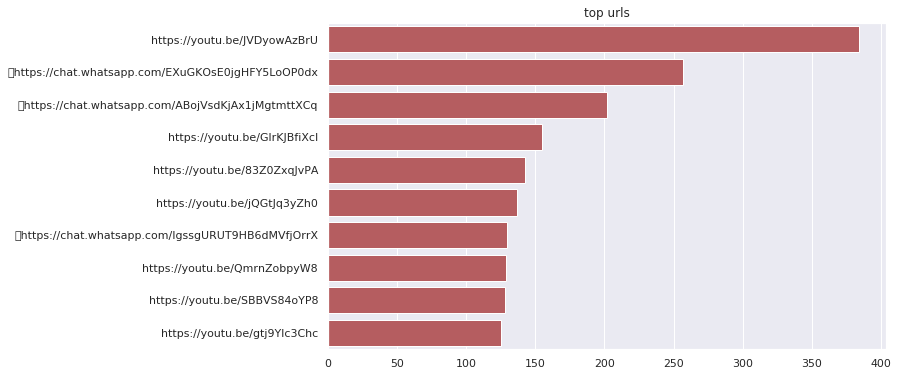

In [149]:
plt.figure(figsize=(10, 6))
plt.title('top urls')
sns.barplot(y=urls[0:10].index,x = urls[0:10].values, color = 'C3')
plt.show()

# Most frequent terms

In [150]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
stopwords = set(stopwords.words('portuguese'))

new_stopwords = ['aí','pra','vão','vou','onde','lá','aqui',
                 'tá','pode','pois','so','deu','agora','todo',
                 'nao','ja','manda','vc', 'bom', 'dia', 'ai',
                 'kkk','kkkk','ta', 'voce', 'alguem', 'ne', 'pq',
                 'cara','to','mim','la','vcs','tbm', 'tudo']
new_stopwords = set(new_stopwords)
stopwords.update(new_stopwords)

In [151]:
todasMensagens = ' '.join(list(df[(df['midia'] == 0) & (df['words'] > 3) & 
                                  (df['characters'] < 1000) & (df['url'] == 0)]['text']))
#todasMensagens = [str(m.lower()) for m in todasMensagens]

In [152]:
wordcloud = WordCloud(stopwords = stopwords, background_color="white",width = 800, height = 600).generate(todasMensagens)
wordcloud.to_file('plots/'+str(base)+'/wordcloud_all_data.png')

In [153]:
#plot wordcloud
if show:
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Queries

In [4]:
def haveWord(word,text):
    word = word.lower()
    text = str(text).lower()
    if word in text:
        return True
    else:
        return False
    
def haveRegex(regex,text):
    matches = re.findall(regex,text)
    if matches:
        return True
    else:
        return False

In [155]:
df_query = df[df.apply(lambda x: haveWord('ptralha',x['text']),axis=1)]
print(len(df_query))
#df_query[0:10]
for m in list(df_query['text'].unique()[0:10]):
    print(m)
    print('***')

82
Mais uma vez o PT deu tiro no pé, veja o que o rapper Mano Brown disse em frente aos PTralhas.
***
ATENÇÃO
Pessoal, estive verificando o que aconteceu no outro grupo.
O número [TELEFONE] é do principal responsável que se infiltrou como administrador. Essa pessoa usa até a imagem a imagem pró Bolsonaro para se infiltrar no grupo.

A ação de excluir os administradores e tomar conta do grupo ocorreu por 4 PTralhas que começaram a remover no mesmo instante.
São eles:
[TELEFONE] (art. 171)
[TELEFONE]
[TELEFONE]
[TELEFONE]
👆🏻Estes foram os principais PTralhas.

Foram adicionados no grupo, principalmente pelo primeiro PTralha 👆🏻os seguintes números também de esquerdopatas:
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE] (art.171)
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE] (art. 171)
[TELEFONE]
[TELEFONE]
[TELEFONE] (art. 171)
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE] (art. 171)
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TEL

In [7]:
df_query = df[df.apply(lambda x: haveWord('PORQUE IREI VOTAR EM JAIR BOLSONARO',x['text']),axis=1)]
df_query

id      date   hour ddi country country_iso3 ddd  \
82982 -8154826686450996383  16/08/18  09:27  55  BRASIL          BRA  71   

       state    group  midia  url  characters  words  viral  sharings  \
82982  Bahia  2018_25      0    0        2506    390      0         1   

                                                    text  misinformation  
82982  *PORQUE IREI VOTAR EM JAIR BOLSONARO PARA PRES...               0

In [11]:
# there are some message tagged as misinformation that is not viral?
df[(df['misinformation']==1) & (df['viral']==0)]

id      date   hour ddi country country_iso3 ddd  \
121     4080266983443972531  24/08/18  17:00  55  BRASIL          BRA  17   
240    -4391661641377612003  02/09/18  14:54  55  BRASIL          BRA  13   
378     2775036360410899212  09/09/18  06:28  55  BRASIL          BRA  24   
417     3631133147603888180  12/09/18  09:57  55  BRASIL          BRA  17   
522    -4391661641377612003  20/09/18  14:46  55  BRASIL          BRA  13   
...                     ...       ...    ...  ..     ...          ...  ..   
281053  -695233245073530941  07/09/18  19:28   ?       ?            ?   ?   
281879  -695233245073530941  09/10/18  22:45   ?       ?            ?   ?   
281976  -695233245073530941  12/10/18  08:15   ?       ?            ?   ?   
282059  -695233245073530941  15/10/18  22:55   ?       ?            ?   ?   
282139  8424212194063834368  18/10/18  11:36   ?       ?            ?   ?   

                 state    group  midia  url  characters  words  viral  \
121          São Paulo   2018_1      0    0        2311    363      0   
240          São Paulo   2018_1      0    0         299     50      0   
378     Rio de Janeiro   2018_1      0    0         208     34      0   
417          São Paulo   2018_1      0    0         118     20      0   
522          São Paulo   2018_1      0    0         267     45      0   
...                ...      ...    ...  ...         ...    ...    ...   
281053               ?  2018_59      0    1         138      1      0   
281879               ?  2018_59      0    0         124     20      0   
281976               ?  2018_59      0    0         955    183      0   
282059               ?  2018_59      0    0         127     22      0   
282139               ?  2018_59      0    0       13123   2221      0   

        sharings                                               text  \
121            1  Há informações fidedignas que o desmoralizado ...   
240            1  Kkkkkk essa acho que nem o Bolsonaro esperava!...   
378            1  Acabou de ser noticiado no *G1*\n😱😱😱\n\nA cand...   
417            1  Saiu o nome da Igreja que está pagando os 4 ad...   
522            1  👇🏿👇🏿👇🏿👇🏿👇🏿👇🏿\n\nProfessor da UFC, Universidade...   
...          ...                                                ...   
281053         1  https://www.jornaldacidadeonline.com.br/notici...   
281879         1  Jornalista Linhares falando num grupo de jorna...   
281976         1  DEPOIS NÃO QUEREM CHAMÁ-LO DE MITO!\n\n✅ O car...   
282059         1  Gente, escutem este áudio. 👆🏻 O Jair Bolsonaro...   
282139         1  Texto longo. Mas, para quem interessar, uma au...   

        misinformation  
121                  1  
240                  1  
378                  1  
417                  1  
522                  1  
...                ...  
281053               1  
281879               1  
281976               1  
282059               1  
282139               1  

[1140 rows x 17 columns]

# Research challenges
* Misinformation detection by text
* Misinformation detection by metadata
* Misinformation spread analysis
* Bot detection
* Hate speech detection